In [1]:
from __future__ import print_function, division
%run basics.ipynb
from sklearn.decomposition import NMF

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

Using Theano backend.


In [2]:
#df = pd.read_pickle('udacity_all_text.df')
df = pd.read_pickle('udacity_video_seq_simple.df')
#df = pd.read_csv('coursera_courses.csv')
print(len(pd.unique(df['course'])))
df.columns

69


Index([u'course', u'lesson', u'title', u'text'], dtype='object')

In [3]:
df.head(2)

,course,lesson,title,text
0,bio110,0,Lesson 0: Orientation and Expectations (~5 min...,"[SOUND]. Hey there, I'm Matt. One of the inst..."
1,bio110,1,Lesson 1: Introduction to Traits and Heredity ...,Let's get started with Tales from the Genome....


In [4]:
df.count()

course    419
lesson    419
title     419
text      419
dtype: int64

In [5]:
#text = df['title'] + ' ' + df['description']
#text = df['all-text']
text = df['text']
text.head(2)

0     [SOUND]. Hey there, I'm Matt. One of the inst...
1     Let's get started with Tales from the Genome....
Name: text, dtype: object

In [6]:
text = text.apply(text_cleanup, args=(None, 2))
print(text.head(2))

0    hey there matt one of the instructors from the...
1    let get started with tales from the genome we ...
Name: text, dtype: object


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, min_df=5, ngram_range=(1, 2))
tfidf = vectorizer.fit_transform(text)
tfidf, words = filter_word_rep(tfidf, vectorizer.get_feature_names())

In [8]:
nmf = NMF(n_components=20, random_state=1).fit(tfidf)

feature_names = words
n_top_words = 10
topic_dict = dict()
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    topic_top_words = ", ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(topic_top_words)
    topic_dict[topic_idx] = topic_top_words
    print()

Topic #0:
width, pixels, viewport, layout, image, images, screen, css, pixel, page

Topic #1:
equation, negative, equals, minus, squared, graph, plus, equal, grant, slope

Topic #2:
patient, patients, health, clinical, physicians, healthcare, care, providers, chronic, marla

Topic #3:
app, app engine, conference, engine, profile, datastore, application, api, memcache, conferences

Topic #4:
android, app, layout, activity, gradle, view, ui, xml, fragment, textview

Topic #5:
algorithm, np, node, nodes, graph, vertex, vertices, edges, shortest, vertex cover

Topic #6:
string, method, program, return, python, variable, expression, grammar, array, loop

Topic #7:
dna, genetic, chromosome, allele, genome, traits, chromosomes, gene, trait, mutation

Topic #8:
customer, business, customers, market, product, company, investors, marketing, startup, revenue

Topic #9:
regression, machine learning, training, features, learning, machine, algorithm, data set, feature, model

Topic #10:
file, gulp, 

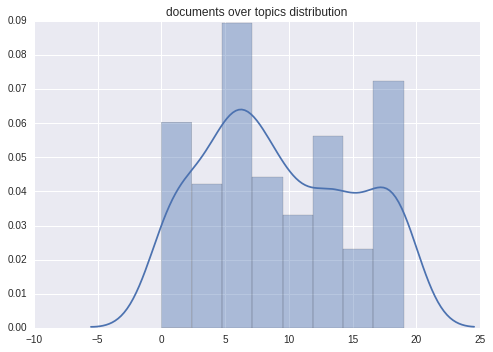


--------------------------------------------------------------------------------
welcome back hope you enjoyed the previous lesson on the common features of frameworks in many cases frameworks seem like magic want to strip away some of the magic so that you ll better understand how your code and framework code fit together in this lesson we ll be diving into backbone and the utility library underscore backbone is highly opinionated framework in the nbc family it uses underscor
topic id: 6
string, method, program, return, python, variable, expression, grammar, array, loop

--------------------------------------------------------------------------------
for the majority of android developers out there the concept of performance is the last thing on their minds most app development is mad sprint towards getting features in making the ui look perfect and figuring out viable monetization strategy or lack thereof if you re in silicon valley but application performance is lot like the plumbi

In [9]:
transformed = nmf.transform(tfidf)
sns.distplot(transformed.argmax(axis=1).flatten())
plt.title('documents over topics distribution')
plt.show()
#most_freq_topic = max(Counter(transformed.argmax(axis=1).flatten()).items(), key=itemgetter(1))[0]
#print('most freq. topic:', most_freq_topic)
#topic_range = np.array(filter(lambda x: x!= most_freq_topic, range(transformed.shape[1])))
#print(topic_range)
#sns.distplot(transformed[:, topic_range].argmax(axis=1).flatten())
#plt.show()
for i in np.random.choice(range(len(text)), size=10):
    print()
    print('-'*80)
    print(text.iloc[i][:400])
    comp_prob = nmf.transform(tfidf[i, :])[:, :].argmax(axis=1)[0]
    print('topic id:', comp_prob)
    print(topic_dict[comp_prob])  

In [10]:
df['topic'] = transformed.argmax(axis=1)
df.head(2)

,course,lesson,title,text,topic
0,bio110,0,Lesson 0: Orientation and Expectations (~5 min...,"[SOUND]. Hey there, I'm Matt. One of the inst...",7
1,bio110,1,Lesson 1: Introduction to Traits and Heredity ...,Let's get started with Tales from the Genome....,7


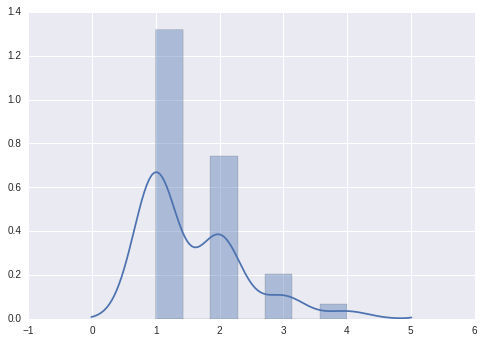

In [11]:
gdf = df.groupby(by='course')
sns.distplot(gdf.apply(lambda x: len(pd.unique(x['topic']))))

In [12]:
num_topics = gdf.apply(lambda x: len(pd.unique(x['topic'])))

In [13]:
num_topics.head(2)

course
bio110    1
cs046     1
dtype: int64

In [14]:
two_topics = set(num_topics[num_topics == 2].index)

In [15]:
filt_df = df[df['course'].apply(lambda x: x in two_topics)]

In [16]:
filt_df.head(2)

,course,lesson,title,text,topic
21,cs101,1,Lesson 1: Q&A,"Welcome to CS101. I'm Dave Evans, I will be y...",6
22,cs101,2,Lesson 2: Q&A,Hello. Welcome to the lesson on How to Solve ...,6


In [17]:
gfilt_df = pd.DataFrame(filt_df.groupby(by='course').apply(lambda x: pd.unique(x['topic'])))

In [18]:
gfilt_df['ones'] = 1
gfilt_df['first'] = map(lambda x: sorted(x)[0], gfilt_df[0])
gfilt_df['second'] = map(lambda x: sorted(x)[1], gfilt_df[0])
pd.pivot_table(gfilt_df, index='first', columns='second', values='ones',
              aggfunc='sum')

second,4,6,8,10,11,13,14,16,18,19
first,,,,,,,,,,
0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN
5,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
6,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,2.0,1.0
9,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [19]:
from bokeh.charts import Scatter
from bokeh.models import HoverTool, ColumnDataSource 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=500, n_iter=1000000, random_state=2016)
tsne_text = tsne.fit_transform(transformed) # [n_samples, n_features]
plot_df = pd.DataFrame(columns=['x', 'y'], data=tsne_text)
plot_df['course'] = df['course'] # add info for hovering 
plot_df['title'] = df['title'] # add info for hovering
print(len(plot_df))
hover = HoverTool(
    tooltips=[("Titles", "@title"), ('Course', '@course')]
)

source = ColumnDataSource(plot_df)
p = figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)
# Add the hover tool
p.add_tools(hover)

# Populate glyphs
p.circle(x='x', y='y', size=7, alpha=0.5, source=source)
#p = Scatter(plot_df, title="scat", width=800, tools=[hover, "pan","box_zoom","wheel_zoom","reset","resize","save"])
show(p)

419


In [20]:
df[df['title']=='']

,course,lesson,title,text,topic
